<a href="https://colab.research.google.com/github/SubhaGopal06/Flight-delay-prediction-using-ML/blob/main/PRI_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
flightsinfo = pd.read_csv("drive/My Drive/PRI_report/flights.csv")

In [7]:
list(flightsinfo.columns)

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [8]:
airport = pd.read_csv('drive/My Drive/PRI_report/airports.csv')
airlines = pd.read_csv('drive/My Drive/PRI_report/airlines.csv')

In [9]:
flightsinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [10]:
flightsinfo.shape

(5819079, 31)

In [11]:
flightsinfo.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [12]:
flightsinfo.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
flightsinfo

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
airlinecompanies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [15]:
airlinecompanies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

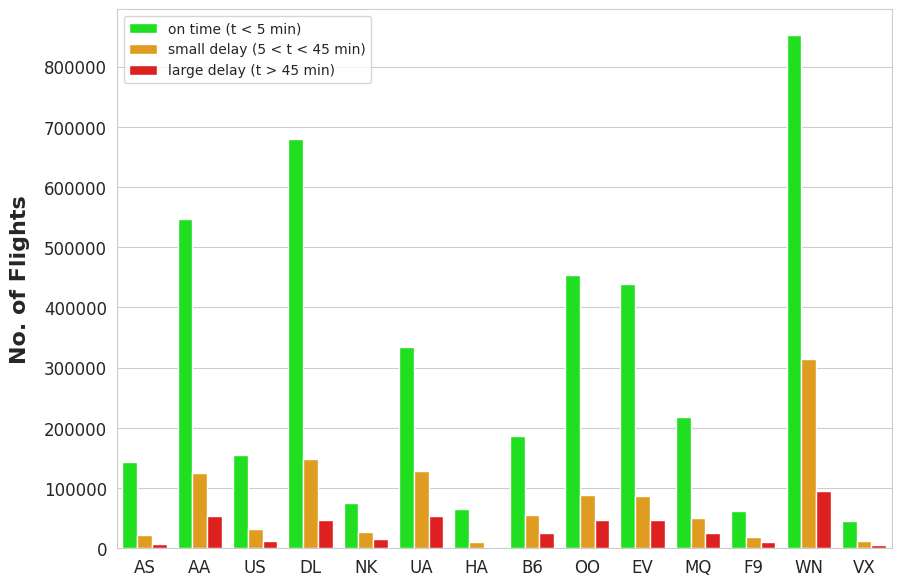

In [16]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flightsinfo['DELAY_LEVEL'] = flightsinfo['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="AIRLINE", hue='DELAY_LEVEL', data=flightsinfo, palette= ["#00FF00","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

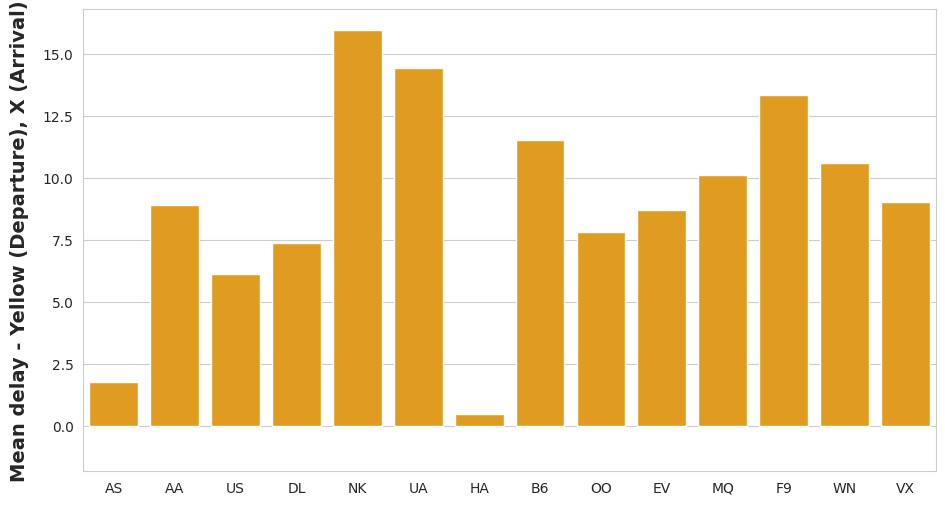

In [17]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flightsinfo, color="orange", ci=None)
ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=flightsinfo, color="b", hatch = 'X',
                 alpha = 0.0, ci=None)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)
plt.ylabel('Mean delay - Yellow (Departure), X (Arrival)',
           fontsize=14, weight = 'bold', labelpad=10);

In [20]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 73.7 MB/s eta 0:00:00


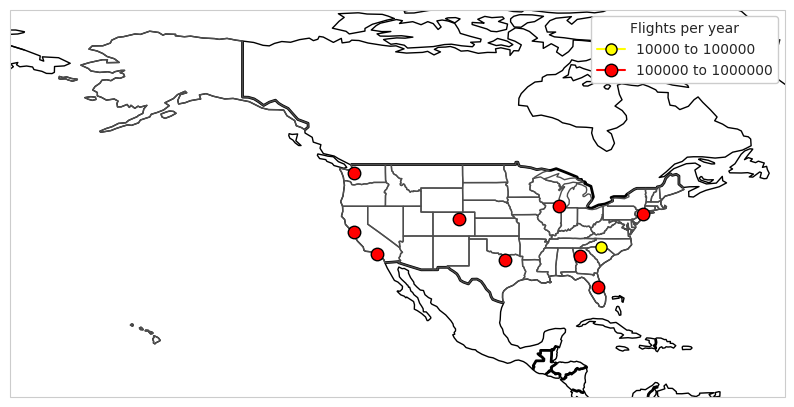

In [23]:
import matplotlib.pyplot as plt
from collections import OrderedDict
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Sample data (replace this with your actual flightsinfo DataFrame)
# flightcount = flightsinfo['ORIGIN_AIRPORT'].value_counts()

# Sample data for the example; replace with actual data
import pandas as pd
flightcount = pd.Series({
    'ATL': 1500000, 'LAX': 800000, 'ORD': 700000, 'DFW': 600000, 'DEN': 500000,
    'JFK': 300000, 'SFO': 250000, 'SEA': 150000, 'MCO': 120000, 'CLT': 100000
})

# Dummy airport DataFrame (replace this with your actual airport DataFrame)
airport = pd.DataFrame({
    'IATA_CODE': ['ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'JFK', 'SFO', 'SEA', 'MCO', 'CLT'],
    'LATITUDE': [33.6367, 33.9425, 41.9742, 32.8998, 39.8617, 40.6413, 37.6213, 47.6062, 28.4312, 35.214],
    'LONGITUDE': [-84.4281, -118.4085, -87.9073, -97.0404, -104.673, -73.7781, -122.379, -122.3321, -81.3081, -80.9431]
})

plt.figure(figsize=(10, 10))

# Define color, size, and labels for flight counts
colors = ['purple', 'green', 'orange', 'yellow', 'red', 'lightblue']
size = [1, 100, 1000, 10000, 100000, 1000000]
labels = ["1 to 100", "100 to 1000", "1000 to 10000", "10000 to 100000", "100000 to 1000000"]

# Set up Cartopy map
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, -50, 10, 75], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor='0.3')

# Plot each airport
for index, (code, lat, lon) in airport[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    if code in flightcount:
        isize = [i for i, val in enumerate(size) if val < flightcount[code]]

        if isize:  # Check if isize is not empty
            ind = min(isize[-1], len(colors) - 1, len(labels) - 1)  # Ensure `ind` is within bounds

            plt.plot(
                lon, lat,
                marker='o',
                markersize=ind + 5,
                markeredgewidth=1,
                color=colors[ind],
                markeredgecolor='k',
                transform=ccrs.PlateCarree(),
                label=labels[ind]
            )
        else:
            print(f"Warning: No size match for flight count {flightcount[code]} at airport {code}")

# Create legend
handles, labels = plt.gca().get_legend_handles_labels()
labels_ord = OrderedDict(zip(labels, handles))
keys = ('1 to 100', '100 to 1000', '1000 to 10000', '10000 to 100000', '100000 to 1000000')
lnew = OrderedDict()
for item in keys:
    if item in labels_ord:
        lnew[item] = labels_ord[item]
plt.legend(lnew.values(), lnew.keys(), loc=1, prop={'size': 10}, title='Flights per year', frameon=True, framealpha=1)

plt.show()


In [24]:
airport.isnull().sum()

,0
IATA_CODE,0
LATITUDE,0
LONGITUDE,0


In [25]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [26]:
airport.head(10)

,IATA_CODE,LATITUDE,LONGITUDE
0,ATL,33.6367,-84.4281
1,LAX,33.9425,-118.4085
2,ORD,41.9742,-87.9073
3,DFW,32.8998,-97.0404
4,DEN,39.8617,-104.6730
5,JFK,40.6413,-73.7781
6,SFO,37.6213,-122.3790
7,SEA,47.6062,-122.3321
8,MCO,28.4312,-81.3081
9,CLT,35.2140,-80.9431


In [27]:
airport.head(10)

,IATA_CODE,LATITUDE,LONGITUDE
0,ATL,33.6367,-84.4281
1,LAX,33.9425,-118.4085
2,ORD,41.9742,-87.9073
3,DFW,32.8998,-97.0404
4,DEN,39.8617,-104.6730
5,JFK,40.6413,-73.7781
6,SFO,37.6213,-122.3790
7,SEA,47.6062,-122.3321
8,MCO,28.4312,-81.3081
9,CLT,35.2140,-80.9431


In [28]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [29]:

flightsinfo_NULL = flightsinfo.isnull().sum()*100/flightsinfo.shape[0]
flightsinfo_NULL


,0
YEAR,0.000000
MONTH,0.000000
DAY,0.000000
DAY_OF_WEEK,0.000000
AIRLINE,0.000000
FLIGHT_NUMBER,0.000000
TAIL_NUMBER,0.252978
ORIGIN_AIRPORT,0.000000
DESTINATION_AIRPORT,0.000000
SCHEDULED_DEPARTURE,0.000000


In [30]:
flightsinfo1 = flightsinfo.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [31]:

flightsinfo1.shape

(5714008, 32)

In [32]:
flightsinfo1.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [33]:
flightsinfo_modified = flightsinfo1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flightsinfo_modified = flightsinfo_modified.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)


In [34]:
flightsinfo_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063439 entries, 27 to 5819071
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   AIRLINE              1063439 non-null  object 
 1   ORIGIN_AIRPORT       1063439 non-null  object 
 2   DESTINATION_AIRPORT  1063439 non-null  object 
 3   DEPARTURE_DELAY      1063439 non-null  float64
 4   TAXI_OUT             1063439 non-null  float64
 5   ELAPSED_TIME         1063439 non-null  float64
 6   DISTANCE             1063439 non-null  int64  
 7   TAXI_IN              1063439 non-null  float64
 8   ARRIVAL_DELAY        1063439 non-null  float64
 9   AIR_SYSTEM_DELAY     1063439 non-null  float64
 10  SECURITY_DELAY       1063439 non-null  float64
 11  AIRLINE_DELAY        1063439 non-null  float64
 12  LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 13  WEATHER_DELAY        1063439 non-null  float64
 14  DELAY_LEVEL          1063439 non-null  int64  
dtypes:

In [35]:
Flight_Delays = flightsinfo_modified

In [36]:
flightsinfo2 = flightsinfo1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [37]:
flightsinfo2.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [38]:
flightsinfo2.shape

(5714008, 26)

In [39]:
flightsinfo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24  CAN

In [40]:

flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [41]:
flightsinfo2.DEPARTURE_TIME

,DEPARTURE_TIME
0,2354.0
1,2.0
2,18.0
3,15.0
4,24.0
...,...
5819074,2355.0
5819075,2355.0
5819076,2350.0
5819077,2353.0


In [42]:
def CreateTimeFormatted(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [43]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Departure']

,Actual_Departure
0,23:54:00
1,00:02:00
2,00:18:00
3,00:15:00
4,00:24:00
...,...
5819074,23:55:00
5819075,23:55:00
5819076,23:50:00
5819077,23:53:00


In [44]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'DELAY_LEVEL',
       'Actual_Departure'],
      dtype='object')

In [45]:

flightsinfo2['Date'] = pd.to_datetime(flightsinfo2[['YEAR','MONTH','DAY']])
flightsinfo2.Date

,Date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
5819074,2015-12-31
5819075,2015-12-31
5819076,2015-12-31
5819077,2015-12-31


In [47]:
flightsinfo2['Day'] = flightsinfo2['Date'].dt.day_name

In [48]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Arrival'] =flightsinfo1['SCHEDULED_ARRIVAL'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Departure'] =flightsinfo1['SCHEDULED_DEPARTURE'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Arrival'] =flightsinfo2['ARRIVAL_TIME'].apply(CreateTimeFormatted)

In [49]:
flightsinfo2 = flightsinfo2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
flightsinfo2 = flightsinfo2.drop(['AIRLINE_x','IATA_CODE'], axis=1)
flightsinfo2 = flightsinfo2.rename(columns={"AIRLINE_y":"AIRLINE"})
flightsinfo2 = flightsinfo2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flightsinfo2 = flightsinfo2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [50]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DELAY_LEVEL', 'Actual_Departure', 'Date',
       'Day', 'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival',
       'AIRLINE', 'IATA_CODE_x', 'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y',
       'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [52]:
flightsinfo2 = flightsinfo2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y', 'STATE_x', 'COUNTRY_x'],
       axis=1, errors='ignore')


In [53]:
flightsinfo2 = flightsinfo2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [54]:

flightsinfo2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DELAY_LEVEL,Actual_Departure,Date,Day,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Dest_Airport_Code
0,2015,1,1,4,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,0,00:18:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,08:06:00,00:20:00,08:11:00,US Airways Inc.,SFO,CLT
1,2015,1,1,4,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,1,00:44:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,08:03:00,00:30:00,07:53:00,US Airways Inc.,LAX,CLT
2,2015,1,1,4,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,0,00:19:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,05:45:00,00:30:00,05:32:00,American Airlines Inc.,SFO,DFW
3,2015,1,1,4,2336,N958DN,DEN,ATL,30,24.0,-6.0,12.0,36.0,173.0,149.0,133.0,1199,449.0,4.0,523,453.0,-30.0,0,0,0,00:24:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,05:23:00,00:30:00,04:53:00,Delta Air Lines Inc.,DEN,ATL
4,2015,1,1,4,1607,N36476,SEA,DEN,530,529.0,-1.0,10.0,539.0,157.0,157.0,138.0,1024,857.0,9.0,907,906.0,-1.0,0,0,0,05:29:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,09:07:00,05:30:00,09:06:00,United Air Lines Inc.,SEA,DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415456,2015,12,31,4,1205,N87527,LAX,ORD,2355,1.0,6.0,18.0,19.0,240.0,220.0,195.0,1744,534.0,7.0,555,541.0,-14.0,0,0,1,00:01:00,2015-12-31,<bound method PandasDelegate._add_delegate_acc...,05:55:00,23:55:00,05:41:00,United Air Lines Inc.,LAX,ORD
415457,2015,12,31,4,471,N570AS,LAX,SEA,2355,2353.0,-2.0,17.0,10.0,169.0,152.0,132.0,954,222.0,3.0,244,225.0,-19.0,0,0,0,23:53:00,2015-12-31,<bound method PandasDelegate._add_delegate_acc...,02:44:00,23:55:00,02:25:00,Alaska Airlines Inc.,LAX,SEA
415458,2015,12,31,4,682,N701FR,DEN,MCO,2359,2354.0,-5.0,12.0,6.0,206.0,190.0,170.0,1546,456.0,8.0,525,504.0,-21.0,0,0,0,23:54:00,2015-12-31,<bound method PandasDelegate._add_delegate_acc...,05:25:00,23:59:00,05:04:00,Frontier Airlines Inc.,DEN,MCO
415459,2015,12,31,4,219,N3LYAA,LAX,ORD,2359,2358.0,-1.0,23.0,21.0,244.0,226.0,198.0,1744,539.0,5.0,603,544.0,-19.0,0,0,0,23:58:00,2015-12-31,<bound method PandasDelegate._add_delegate_acc...,06:03:00,23:59:00,05:44:00,American Airlines Inc.,LAX,ORD


In [56]:
data_vizual = flightsinfo2.reindex(columns=['AIRLINE', 'Org_Airport_Name', 'Origin_city',
                                            'Dest_Airport_Name', 'Destination_city', 'ORIGIN_AIRPORT',
                                            'DESTINATION_AIRPORT', 'DISTANCE', 'Actual_Departure', 'Date', 'Day',
                                            'Scheduled_Departure', 'DEPARTURE_DELAY', 'Actual_Arrival',
                                            'Scheduled_Arrival', 'ARRIVAL_DELAY', 'SCHEDULED_TIME',
                                            'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'TAXI_OUT', 'DIVERTED'])


In [57]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [58]:
data_vizual = data_vizual.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [59]:

data_vizual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415028 entries, 0 to 415460
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AIRLINE              415028 non-null  object        
 1   Org_Airport_Name     0 non-null       float64       
 2   Origin_city          0 non-null       float64       
 3   Dest_Airport_Name    0 non-null       float64       
 4   Destination_city     0 non-null       float64       
 5   ORIGIN_AIRPORT       415028 non-null  object        
 6   DESTINATION_AIRPORT  415028 non-null  object        
 7   DISTANCE             415028 non-null  int64         
 8   Actual_Departure     415028 non-null  object        
 9   Date                 415028 non-null  datetime64[ns]
 10  Day                  415028 non-null  object        
 11  Scheduled_Departure  415028 non-null  object        
 12  DEPARTURE_DELAY      415028 non-null  float64       
 13  Actual_Arrival     

In [60]:
Flights = data_vizual
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,Day,Scheduled_Departure,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,US Airways Inc.,NaN,NaN,NaN,NaN,SFO,CLT,2296,00:18:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:20:00,-2.0,08:11:00,08:06:00,5.0,286.0,293.0,266.0,11.0,16.0,0
1,US Airways Inc.,NaN,NaN,NaN,NaN,LAX,CLT,2125,00:44:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:30:00,14.0,07:53:00,08:03:00,-10.0,273.0,249.0,228.0,8.0,13.0,0
2,American Airlines Inc.,NaN,NaN,NaN,NaN,SFO,DFW,1464,00:19:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:30:00,-11.0,05:32:00,05:45:00,-13.0,195.0,193.0,173.0,3.0,17.0,0
3,Delta Air Lines Inc.,NaN,NaN,NaN,NaN,DEN,ATL,1199,00:24:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:30:00,-6.0,04:53:00,05:23:00,-30.0,173.0,149.0,133.0,4.0,12.0,0
4,United Air Lines Inc.,NaN,NaN,NaN,NaN,SEA,DEN,1024,05:29:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,05:30:00,-1.0,09:06:00,09:07:00,-1.0,157.0,157.0,138.0,9.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415456,United Air Lines Inc.,NaN,NaN,NaN,NaN,LAX,ORD,1744,00:01:00,2015-12-31,<bound method PandasDelegate._add_delegate_acc...,23:55:00,6.0,05:41:00,05:55:00,-14.0,240.0,220.0,195.0,7.0,18.0,0
415457,Alaska Airlines Inc.,NaN,NaN,NaN,NaN,LAX,SEA,954,23:53:00,2015-12-31,<bound method PandasDelegate._add_delegate_acc...,23:55:00,-2.0,02:25:00,02:44:00,-19.0,169.0,152.0,132.0,3.0,17.0,0
415458,Frontier Airlines Inc.,NaN,NaN,NaN,NaN,DEN,MCO,1546,23:54:00,2015-12-31,<bound method PandasDelegate._add_delegate_acc...,23:59:00,-5.0,05:04:00,05:25:00,-21.0,206.0,190.0,170.0,8.0,12.0,0
415459,American Airlines Inc.,NaN,NaN,NaN,NaN,LAX,ORD,1744,23:58:00,2015-12-31,<bound method PandasDelegate._add_delegate_acc...,23:59:00,-1.0,05:44:00,06:03:00,-19.0,244.0,226.0,198.0,5.0,23.0,0


In [64]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,Day,Scheduled_Departure,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,US Airways Inc.,NaN,NaN,NaN,NaN,SFO,CLT,2296,00:18:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:20:00,-2.0,08:11:00,08:06:00,5.0,286.0,293.0,266.0,11.0,16.0,0
1,US Airways Inc.,NaN,NaN,NaN,NaN,LAX,CLT,2125,00:44:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:30:00,14.0,07:53:00,08:03:00,-10.0,273.0,249.0,228.0,8.0,13.0,0
2,American Airlines Inc.,NaN,NaN,NaN,NaN,SFO,DFW,1464,00:19:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:30:00,-11.0,05:32:00,05:45:00,-13.0,195.0,193.0,173.0,3.0,17.0,0
3,Delta Air Lines Inc.,NaN,NaN,NaN,NaN,DEN,ATL,1199,00:24:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:30:00,-6.0,04:53:00,05:23:00,-30.0,173.0,149.0,133.0,4.0,12.0,0
4,United Air Lines Inc.,NaN,NaN,NaN,NaN,SEA,DEN,1024,05:29:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,05:30:00,-1.0,09:06:00,09:07:00,-1.0,157.0,157.0,138.0,9.0,10.0,0


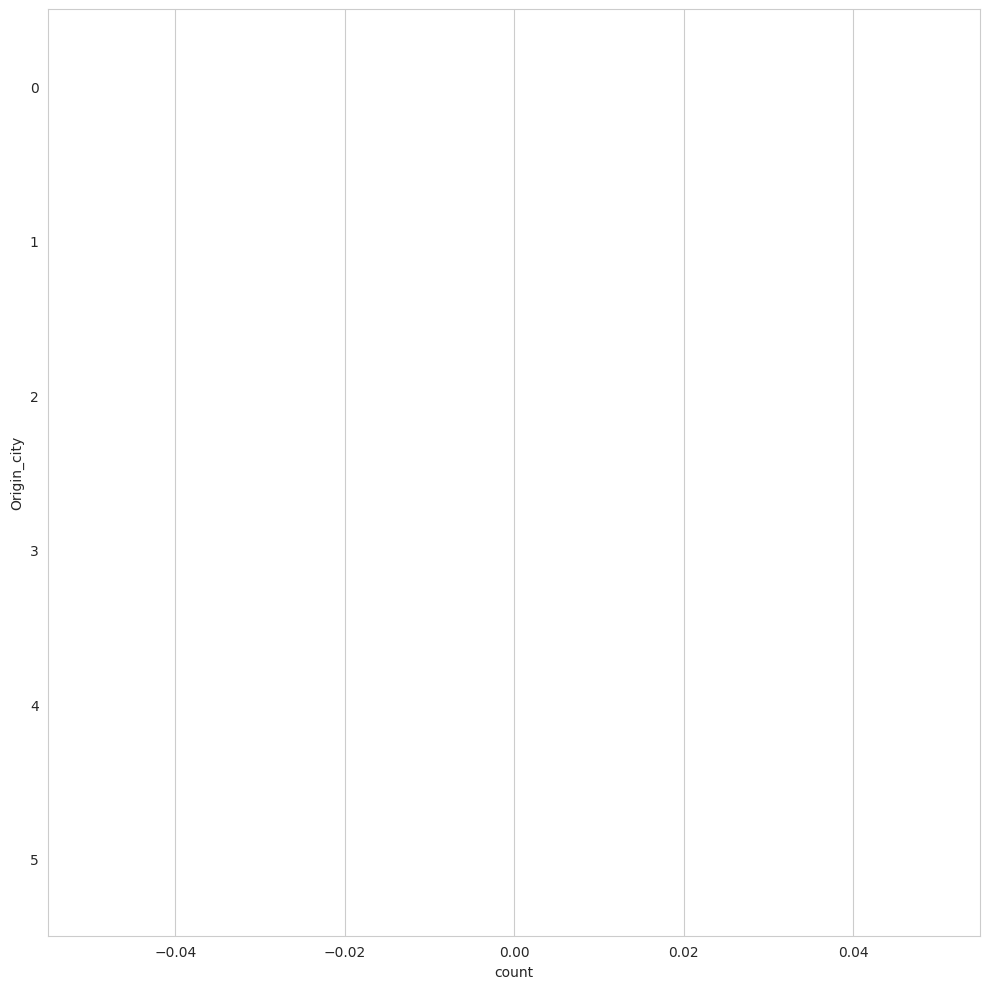

In [150]:
plt.figure(figsize=(10, 10))
# Get the 20 most frequent origin cities
top_20_cities = Flights['Origin_city'].value_counts().head(20).index
# Use the top 20 cities for the countplot
axis = sns.countplot(y=Flights['Origin_city'], data=Flights,
                     order=top_20_cities, palette="Set2")
axis.set_yticklabels(axis.get_yticklabels())
plt.tight_layout()
plt.show()


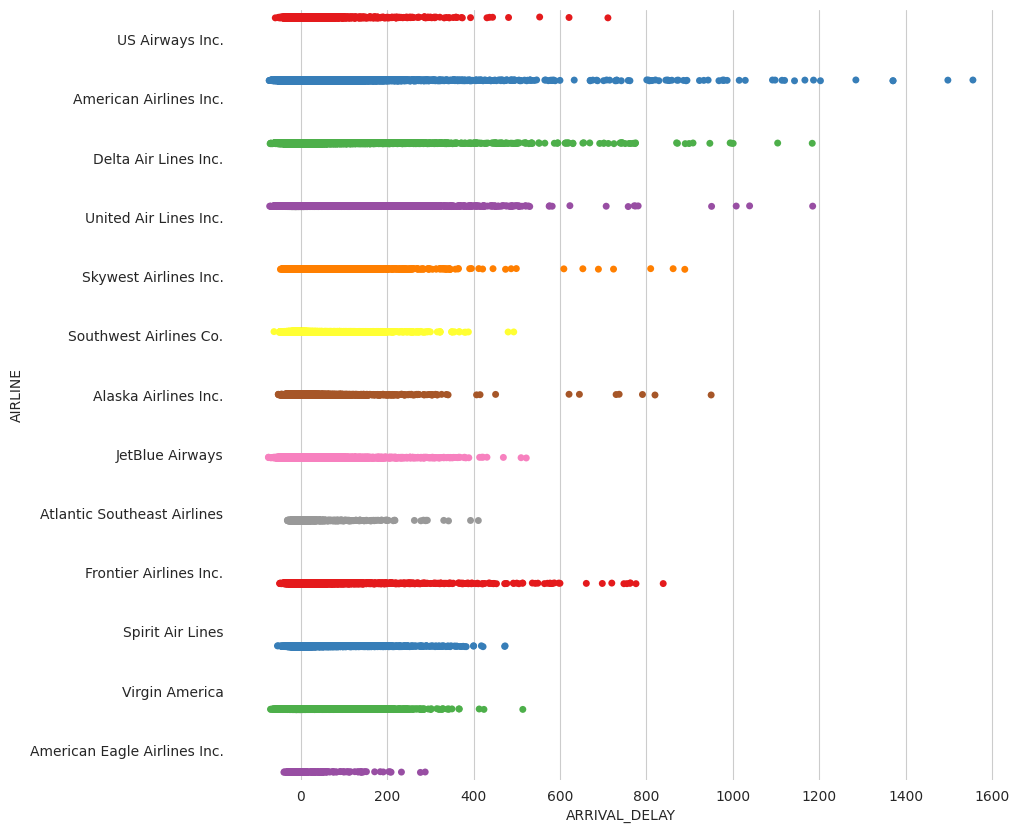

In [66]:

axis = plt.subplots(figsize=(10,10))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, dodge=True, jitter=True,palette="Set1")
plt.show()

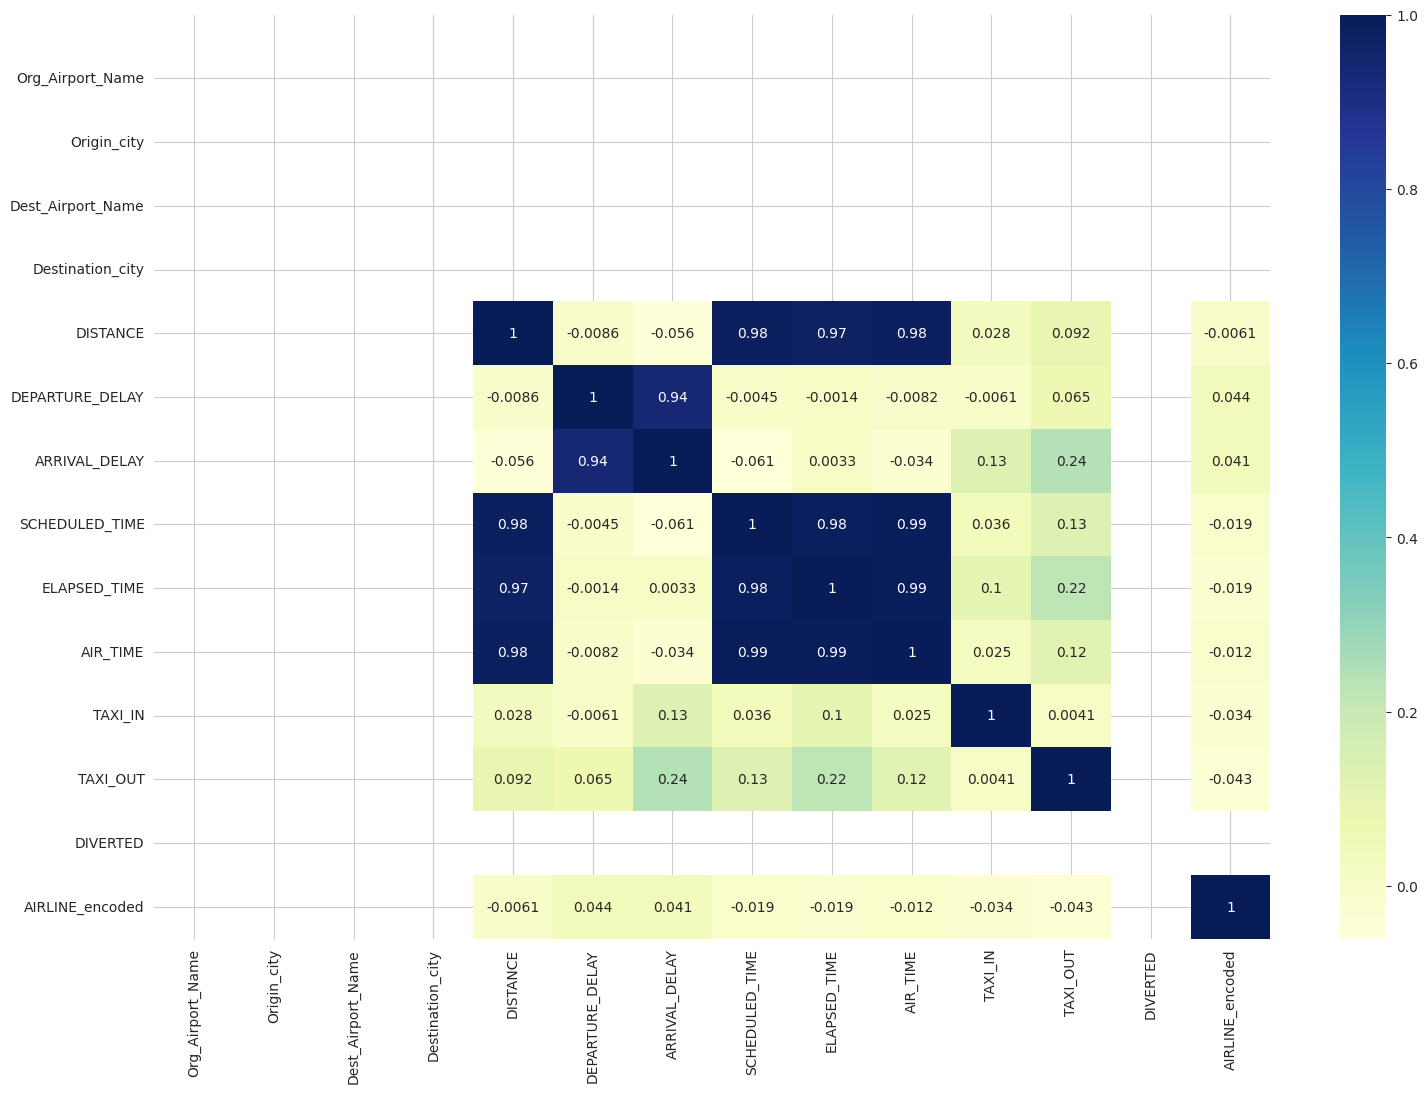

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'AIRLINE' column to numerical representation using Label Encoding
# !pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Flights['AIRLINE_encoded'] = le.fit_transform(Flights['AIRLINE'])

axis = plt.subplots(figsize=(18,12))
# Use only numerical features for correlation
numerical_features = Flights.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True, cmap="YlGnBu")
b, t = plt.ylim()
t -= 0.5
plt.ylim(b, t)
plt.show()

In [69]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,Day,Scheduled_Departure,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,AIRLINE_encoded
0,US Airways Inc.,NaN,NaN,NaN,NaN,SFO,CLT,2296,00:18:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:20:00,-2.0,08:11:00,08:06:00,5.0,286.0,293.0,266.0,11.0,16.0,0,10
1,US Airways Inc.,NaN,NaN,NaN,NaN,LAX,CLT,2125,00:44:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:30:00,14.0,07:53:00,08:03:00,-10.0,273.0,249.0,228.0,8.0,13.0,0,10
2,American Airlines Inc.,NaN,NaN,NaN,NaN,SFO,DFW,1464,00:19:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:30:00,-11.0,05:32:00,05:45:00,-13.0,195.0,193.0,173.0,3.0,17.0,0,1
3,Delta Air Lines Inc.,NaN,NaN,NaN,NaN,DEN,ATL,1199,00:24:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,00:30:00,-6.0,04:53:00,05:23:00,-30.0,173.0,149.0,133.0,4.0,12.0,0,4
4,United Air Lines Inc.,NaN,NaN,NaN,NaN,SEA,DEN,1024,05:29:00,2015-01-01,<bound method PandasDelegate._add_delegate_acc...,05:30:00,-1.0,09:06:00,09:07:00,-1.0,157.0,157.0,138.0,9.0,10.0,0,11


In [70]:
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [71]:

Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED', 'AIRLINE_encoded'],
      dtype='object')

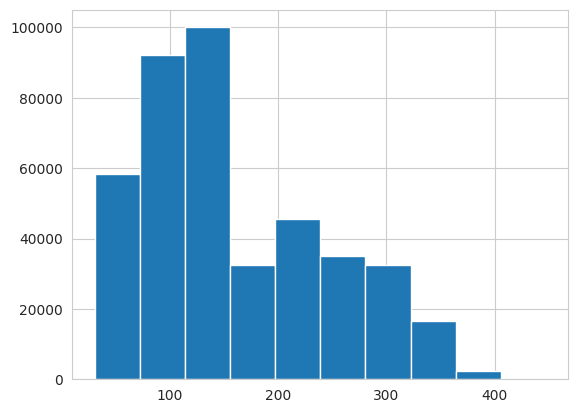

In [72]:

plt.hist(Flights1['AIR_TIME'])
plt.show()

In [73]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [74]:

le = LabelEncoder()

In [75]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [76]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [77]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415028 entries, 0 to 415460
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AIRLINE              415028 non-null  int64  
 1   ORIGIN_AIRPORT       415028 non-null  int64  
 2   DESTINATION_AIRPORT  415028 non-null  int64  
 3   DISTANCE             415028 non-null  int64  
 4   Day                  415028 non-null  int64  
 5   DEPARTURE_DELAY      415028 non-null  float64
 6   ARRIVAL_DELAY        415028 non-null  float64
 7   SCHEDULED_TIME       415028 non-null  float64
 8   ELAPSED_TIME         415028 non-null  float64
 9   AIR_TIME             415028 non-null  float64
 10  TAXI_IN              415028 non-null  float64
 11  TAXI_OUT             415028 non-null  float64
 12  DIVERTED             415028 non-null  int64  
 13  AIRLINE_encoded      415028 non-null  int64  
dtypes: float64(7), int64(7)
memory usage: 63.6 MB


In [78]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(415028, 13)

In [79]:
y = Flights1['ARRIVAL_DELAY']
y.head()

,ARRIVAL_DELAY
0,5.0
1,-10.0
2,-13.0
3,-30.0
4,-1.0


In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [81]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [82]:

from sklearn.linear_model import LinearRegression
LinR = LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

fitResult = LinR.fit(X_train_sc,y_train)
y_pred = fitResult.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, y_pred))
print ('MSE:' , mean_squared_error(y_test, y_pred))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:' , r2_score(y_test, y_pred))

MAE: 3.5368678899515657e-13
MSE: 1.6508535610137004e-25
RMSE: 4.0630697274520166e-13
R2: 1.0


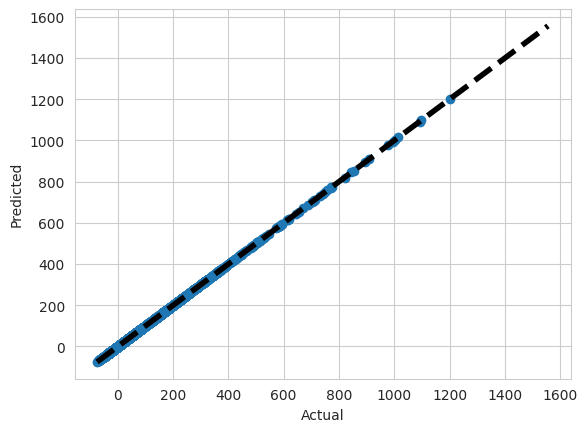

In [83]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [84]:
from sklearn.ensemble import RandomForestRegressor
Rfc = RandomForestRegressor(random_state=2)

fitResultR = Rfc.fit(X_train_sc,y_train)
predictedValues = fitResultR.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 1.647399307998496
MSE: 14.390060702410441
RMSE: 3.7934233486931617
R2: 0.9919829741460569


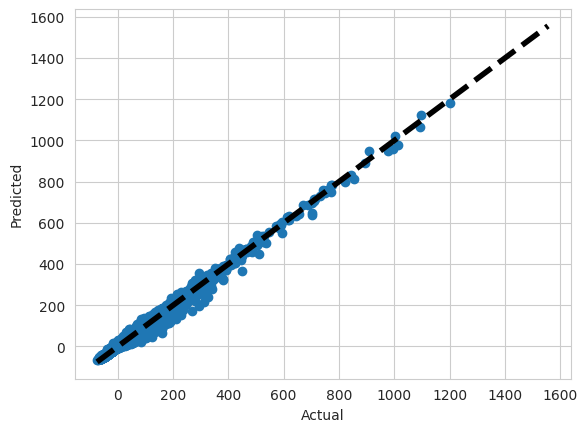

In [85]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [86]:
from sklearn.tree import DecisionTreeRegressor
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train_sc,y_train)
predictedValues = fitResultdtc.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 3.0131171872741116
MSE: 33.897529805217964
RMSE: 5.822158517699253
R2: 0.9811149251936291


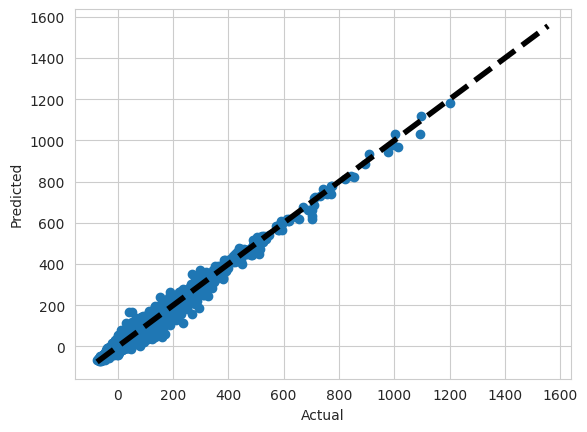

In [87]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [89]:
!pip install scikit-learn --upgrade

In [90]:
from sklearn.ensemble import AdaBoostRegressor
# The 'base_estimator' argument was removed in scikit-learn 1.2
# Use 'estimator' instead if you have a newer version installed
# or remove it if you want to use the default DecisionTreeRegressor.
Boost_Lin = AdaBoostRegressor(estimator=LinR, random_state=2)
# If you are using an old version of scikit-learn you can remove the base estimator.
# Boost_Lin = AdaBoostRegressor(random_state=2)


fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
predictedValues = fitResultBl.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 4.965261656494859e-14
MSE: 4.218543046024807e-27
RMSE: 6.49503121318505e-14
R2: 1.0


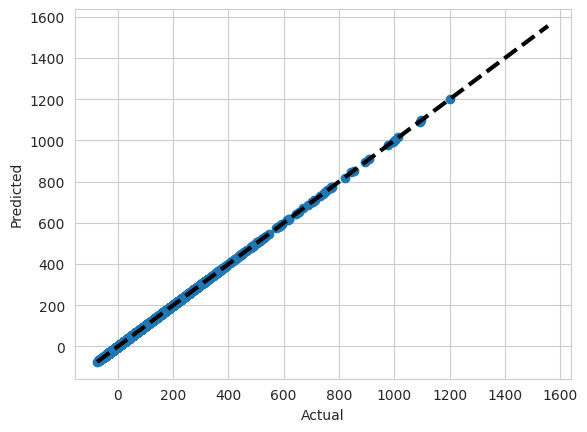

In [91]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()


In [92]:
X = Flights1.drop(['ARRIVAL_DELAY','DEPARTURE_DELAY'],axis = 1)
X.shape

(415028, 12)

In [93]:
y = Flights1['DEPARTURE_DELAY']
y.head()

,DEPARTURE_DELAY
0,-2.0
1,14.0
2,-11.0
3,-6.0
4,-1.0


In [94]:
X

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,AIRLINE_encoded
0,10,9,1,2296,0,286.0,293.0,266.0,11.0,16.0,0,10
1,10,5,1,2125,0,273.0,249.0,228.0,8.0,13.0,0,10
2,1,9,3,1464,0,195.0,193.0,173.0,3.0,17.0,0,1
3,4,2,0,1199,0,173.0,149.0,133.0,4.0,12.0,0,4
4,11,8,2,1024,0,157.0,157.0,138.0,9.0,10.0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
415456,11,5,7,1744,0,240.0,220.0,195.0,7.0,18.0,0,11
415457,0,5,8,954,0,169.0,152.0,132.0,3.0,17.0,0,0
415458,5,2,6,1546,0,206.0,190.0,170.0,8.0,12.0,0,5
415459,1,5,7,1744,0,244.0,226.0,198.0,5.0,23.0,0,1


In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [96]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=16)

mlp.fit(X_train_sc, y_train)

predictedValues = mlp.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))


MAE: 19.876131184973612
MSE: 1520.6343787848946
RMSE: 38.99531226679554
R2: 0.018929755871770815


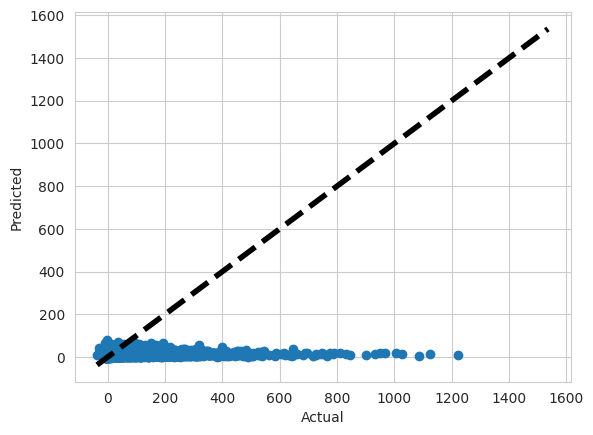

In [97]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [98]:
fitResultR = Rfc.fit(X_train_sc,y_train)
predictedValues = fitResultR.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 21.623828810786694
MSE: 1677.416390130869
RMSE: 40.95627412412986
R2: -0.08222155853493063


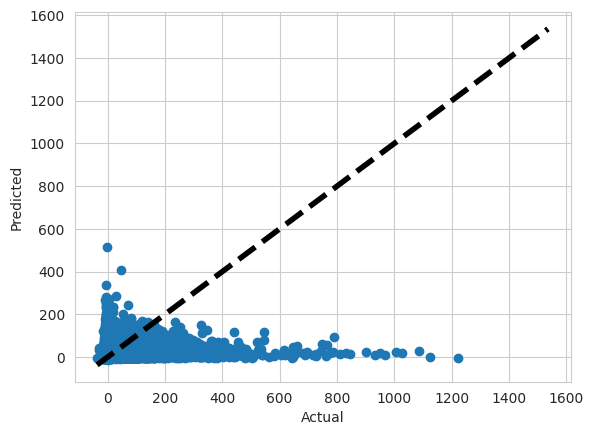

In [99]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [100]:
fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
predictedValues = fitResultBl.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 24.566050323761225
MSE: 1607.030000617023
RMSE: 40.08777869397384
R2: -0.03681025302516505


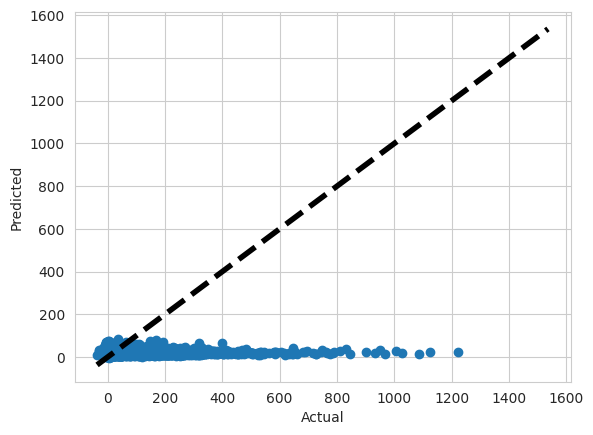

In [101]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [102]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,AIRLINE_encoded
398014,8,2,5,862,0,150.0,135.0,116.0,8.0,11.0,0,8
101557,1,7,3,802,0,159.0,153.0,127.0,10.0,16.0,0,1
108478,12,4,5,2475,0,385.0,379.0,357.0,7.0,15.0,0,12
310152,0,5,8,954,0,160.0,160.0,137.0,11.0,12.0,0,0
218270,8,2,6,1546,0,215.0,216.0,192.0,7.0,17.0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
387674,11,3,7,802,0,146.0,140.0,113.0,14.0,13.0,0,11
389074,0,2,8,1024,0,175.0,183.0,166.0,5.0,12.0,0,0
59194,6,4,7,740,0,169.0,172.0,127.0,14.0,31.0,0,6
193981,12,7,5,1744,0,260.0,268.0,226.0,8.0,34.0,0,12


In [103]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,AIRLINE_encoded
0,10,9,1,2296,0,-2.0,5.0,286.0,293.0,266.0,11.0,16.0,0,10
1,10,5,1,2125,0,14.0,-10.0,273.0,249.0,228.0,8.0,13.0,0,10
2,1,9,3,1464,0,-11.0,-13.0,195.0,193.0,173.0,3.0,17.0,0,1
3,4,2,0,1199,0,-6.0,-30.0,173.0,149.0,133.0,4.0,12.0,0,4
4,11,8,2,1024,0,-1.0,-1.0,157.0,157.0,138.0,9.0,10.0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415456,11,5,7,1744,0,6.0,-14.0,240.0,220.0,195.0,7.0,18.0,0,11
415457,0,5,8,954,0,-2.0,-19.0,169.0,152.0,132.0,3.0,17.0,0,0
415458,5,2,6,1546,0,-5.0,-21.0,206.0,190.0,170.0,8.0,12.0,0,5
415459,1,5,7,1744,0,-1.0,-19.0,244.0,226.0,198.0,5.0,23.0,0,1


In [104]:
Flights1['ORIGIN_AIRPORT'] = Flights1['ORIGIN_AIRPORT'].astype(str)
Flights1['DESTINATION_AIRPORT'] = Flights1['DESTINATION_AIRPORT'].astype(str)

In [105]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])

In [106]:
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)

In [108]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,AIRLINE_encoded,Is_Delayed
0,10,9,1,2296,0,-2.0,5.0,286.0,293.0,266.0,11.0,16.0,0,10,1
1,10,5,1,2125,0,14.0,-10.0,273.0,249.0,228.0,8.0,13.0,0,10,0
2,1,9,3,1464,0,-11.0,-13.0,195.0,193.0,173.0,3.0,17.0,0,1,0
3,4,2,0,1199,0,-6.0,-30.0,173.0,149.0,133.0,4.0,12.0,0,4,0
4,11,8,2,1024,0,-1.0,-1.0,157.0,157.0,138.0,9.0,10.0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415456,11,5,7,1744,0,6.0,-14.0,240.0,220.0,195.0,7.0,18.0,0,11,0
415457,0,5,8,954,0,-2.0,-19.0,169.0,152.0,132.0,3.0,17.0,0,0,0
415458,5,2,6,1546,0,-5.0,-21.0,206.0,190.0,170.0,8.0,12.0,0,5,0
415459,1,5,7,1744,0,-1.0,-19.0,244.0,226.0,198.0,5.0,23.0,0,1,0


In [109]:
X = Flights1.drop(['ARRIVAL_DELAY','Is_Delayed'],axis = 1)
X.shape
y = Flights1['Is_Delayed']
y.head()

,Is_Delayed
0,1
1,0
2,0
3,0
4,0


In [110]:
X

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,AIRLINE_encoded
0,10,9,1,2296,0,-2.0,286.0,293.0,266.0,11.0,16.0,0,10
1,10,5,1,2125,0,14.0,273.0,249.0,228.0,8.0,13.0,0,10
2,1,9,3,1464,0,-11.0,195.0,193.0,173.0,3.0,17.0,0,1
3,4,2,0,1199,0,-6.0,173.0,149.0,133.0,4.0,12.0,0,4
4,11,8,2,1024,0,-1.0,157.0,157.0,138.0,9.0,10.0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415456,11,5,7,1744,0,6.0,240.0,220.0,195.0,7.0,18.0,0,11
415457,0,5,8,954,0,-2.0,169.0,152.0,132.0,3.0,17.0,0,0
415458,5,2,6,1546,0,-5.0,206.0,190.0,170.0,8.0,12.0,0,5
415459,1,5,7,1744,0,-1.0,244.0,226.0,198.0,5.0,23.0,0,1


In [111]:
y

,Is_Delayed
0,1
1,0
2,0
3,0
4,0
...,...
415456,0
415457,0
415458,0
415459,0


In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [113]:

y_train.value_counts()

,count
Is_Delayed,
0,176918
1,113601


In [116]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
# Replace 'fit_sample' with 'fit_resample'
X_train, y_train = smt.fit_resample(X_train, y_train)

In [117]:
pd.Series(y_train).value_counts()

,count
Is_Delayed,
1,176918
0,176918


In [118]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [119]:
y_train

,Is_Delayed
0,1
1,1
2,0
3,0
4,1
...,...
353831,1
353832,1
353833,1
353834,1


In [120]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,AIRLINE_encoded
38627,4,4,2,1626,0,0.0,285.0,274.0,243.0,7.0,24.0,0,4
288596,4,2,0,1199,0,2.0,175.0,162.0,141.0,5.0,16.0,0,4
315383,1,1,9,2296,0,0.0,334.0,309.0,291.0,6.0,12.0,0,1
131843,1,3,2,641,0,229.0,133.0,116.0,92.0,9.0,15.0,0,1
40429,6,5,4,2475,0,-6.0,318.0,312.0,297.0,7.0,8.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383394,9,3,0,731,0,-5.0,124.0,114.0,90.0,9.0,15.0,0,9
349214,4,5,8,954,0,80.0,170.0,141.0,123.0,5.0,13.0,0,4
38391,1,5,7,1744,0,-5.0,246.0,241.0,217.0,8.0,16.0,0,1
151008,11,2,0,1199,0,24.0,176.0,186.0,158.0,5.0,23.0,0,11


In [121]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = None)
classifierDT.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy')

In [122]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

In [123]:
# Predicting the Test set results
y_pred = classifierDT.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
score = classifierDT.score(X_test_sc,y_test)

In [124]:
cm

array([[    0, 76008],
       [    0, 48501]])

In [125]:

score

0.9473772980266487

In [126]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))

F1 score : 0.2803363967400728
Precision Score : 0.19476905283955376
Recall Score : 0.5


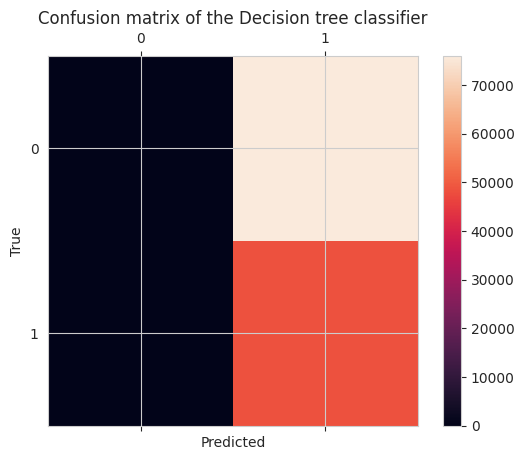

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Decision tree classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [128]:
from sklearn.neighbors import KNeighborsClassifier
objClassifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
objClassifier.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=10)

In [129]:

y_pred=objClassifier.predict(X_test_sc)

#Making the confussion matarix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

score=objClassifier.score(X_test,y_test)

In [131]:
cm

array([[71377,  4631],
       [ 7910, 40591]])

In [132]:
score


0.3895381056791075

In [133]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))

F1 score : 0.892717407864761
Precision Score : 0.8989149717013424
Recall Score : 0.887991391044662


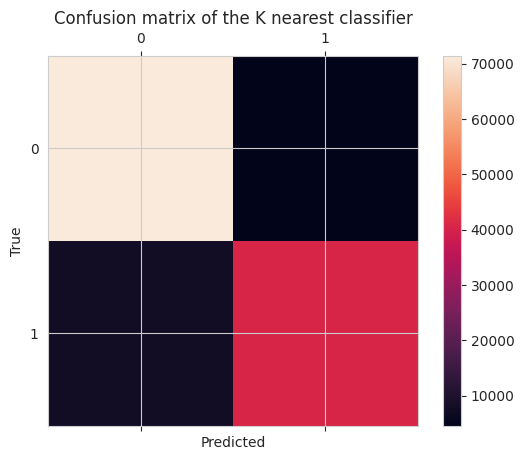

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the K nearest classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [135]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

In [137]:

# Predicting the Test set results
y_pred = classifier.predict(X_test_sc)

# Making the Confusion Matrix
score = classifier.score(X_test_sc,y_test)
cm = confusion_matrix(y_test, y_pred)


In [138]:
cm

array([[75991,    17],
       [    0, 48501]])

In [139]:
score

0.9998634636853561

In [140]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))

F1 score : 0.9998564668745406
Precision Score : 0.9998248072880168
Recall Score : 0.9998881696663509


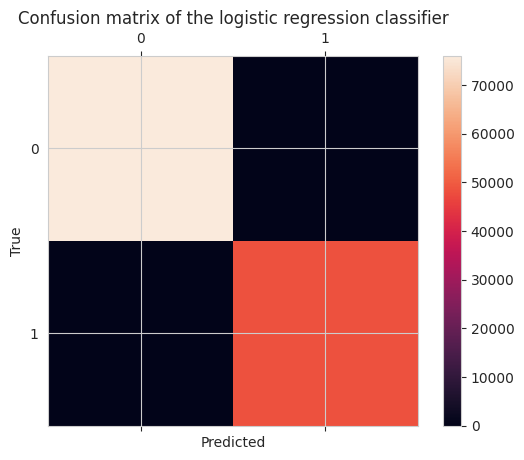

In [141]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the logistic regression classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [142]:
from sklearn.naive_bayes import GaussianNB
objclassifierGNB=GaussianNB()
objclassifierGNB.fit(X_train_sc,y_train)

GaussianNB()

In [143]:
# Predicting the Test set results
y_pred = objclassifierGNB.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
score = objclassifierGNB.score(X_test_sc,y_test)

In [144]:
cm

array([[75785,   223],
       [34855, 13646]])

In [145]:
score

0.8296589001598278

In [146]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))

F1 score : 0.6248227600537831
Precision Score : 0.834445122269754
Recall Score : 0.6392105609566011


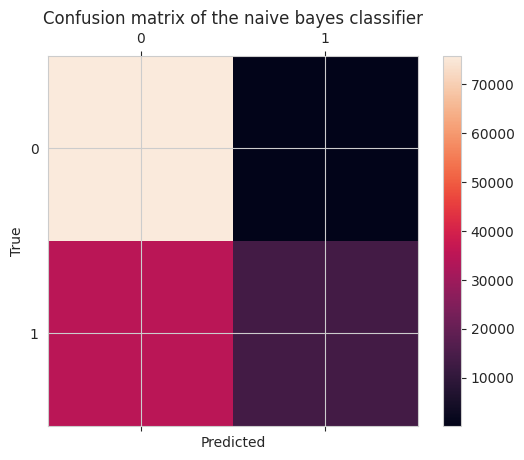

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the naive bayes classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()